# Homework 4

Ben Smith

ECON 213R

10/13/18

We will test several models in an attempt to predict poverty levels in Costa Rican household. Before doing this, however we will look at our data and clean it as much as necessary. Then, we will try several models influenced by class lectures and kernels available on Kaggle. In the end, we will use what we have seen from these models to create what we hope to be the best model for this data.

I thank Professor Folkman, Will Koehrsen, and Shivam Bansal for inspiring important parts of my code.

Some links to their work are:

Professor Folkman's GitHub: https://github.com/tfolkman/byu_econ_applied_machine_learning/tree/master/lectures

Will Koehrsen's kernel: https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough

Shivam Bansal's kernel: https://www.kaggle.com/shivamb/costa-rica-poverty-exploration-kernel

First, let's import the modules we'll need, as well as our data.

In [97]:
import os
import pandas as pd
import numpy as np
from collections import OrderedDict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor, ElasticNetCV
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, make_scorer, f1_score, classification_report, accuracy_score, precision_recall_curve, average_precision_score, precision_recall_fscore_support, confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [98]:
pd.options.display.max_columns = 150

wrkdir = 'C:/Users//Ben Smith//Downloads'

os.chdir(wrkdir)

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [99]:
#Let's check that our train file and test file look good
train[:3]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.00,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.00,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.25,64.0,121.0,8464,4


In [100]:
test[:3]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681


In [101]:
#Let's look at the information about our training file.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


There are 5 objects. At least the vast majority of variables are all numbers, either integers or floats.

In [102]:
#How about our test file?
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


Our test file is similar to our train file as far as variables' values are concerned. The only difference here is that we are missing the Target variable, which is an integer value and is the variable we intend to predict in the test file.

Let's see what details we can learn about the object variables in the train file.

In [103]:
train.select_dtypes(include=['object']).head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


So we see that 2 of our variables with strings are identifiers, which makes sense. However dependency, edjefe, and edjefa are mixes of numbers and strings. We need to do something about that. The data documentation says the following about those variables:

"dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)

edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0"

So in all three cases, we can interpret "yes" as 1 and "no" as 0. Let's replace yes with 1 and no with 0. These seem to be the only strings present in the three variables, so the variables should be ready to go after this change.

In [104]:
#This mapping was Will Koehrsen's idea
mapping = {"yes": 1, "no": 0}

files = [train, test]
float_vars = ['dependency', 'edjefa', 'edjefe']

# Apply mapping to all three variables in both files 
for df in files:
    for var in float_vars:
        # Fill in the values with the correct mapping
        df[var] = df[var].replace(mapping).astype(np.float64)

#Let's see how these variables look now in our train file.
train[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


We have now made dependency, edjefa, and edjefe into purely numeric variables!

Now let's temporarily combine our training and testing data so that we can work with their variables all at once.

In [105]:
#The test file doesn't have a Target variable, so let's create one and fill it with missing values
test['Target'] = np.nan
#Name our combined file "data"
data = train.append(test, ignore_index = True)

What does our target variable look like? A quick look at the data tells us that most of our data pertains to households that are not vulnerable to poverty (4 on the scale of Target). In order to get each household, we look at our data for our heads of households (parentesco1 == 1) 

In [106]:
#I like Will Koehrsen's color scheme for his plots. These dictionaries are from his code in order to help me make colorful graphs with respect to poverty levels like his

colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non-vulnerable'})

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

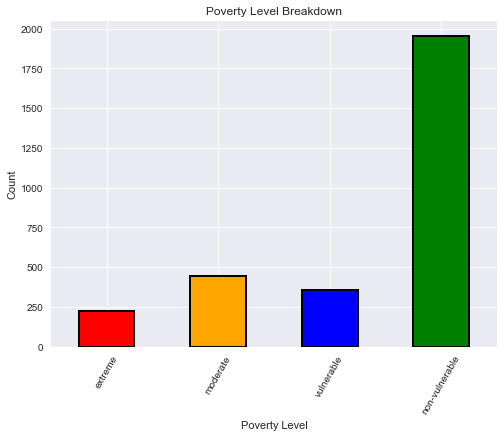

In [107]:
#This graph will be similar to the one Will Koehrsen made for this purpose

#Create variable for heads of household
heads = data.loc[data['parentesco1'] == 1].copy()

#Here, we create labels for which data comes from training data -- these labels are based on whether our Target variable is missing or not
train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1'] == 1), ['Target', 'idhogar']]

#Let's count the values in our Target variable in the training data
label_counts = train_labels['Target'].value_counts().sort_index()

#Bar plot of household-level occurrences of each label
label_counts.plot.bar(figsize = (8, 6), color = colors.values(),
                      edgecolor = 'k', linewidth = 2) 

#Here we format our graph
plt.xlabel('Poverty Level'); plt.ylabel('Count'); 
plt.xticks([x - 1 for x in poverty_mapping.keys()], 
           list(poverty_mapping.values()), rotation = 60)
plt.title('Poverty Level Breakdown');

#This command will show us how many households are in each category within our training data
label_counts

So we have a lot more non-vulnerable households than any other category of households. Also, we only have 222 in extreme poverty, which is our focus.

Let's get back to data cleaning. For some reason, there are people in the same household with different poverty levels. Let's fix that. 

In [108]:
#Group individuals into their households (idhogar) and find out how many households are uniform in their poverty level (only one unique value)
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

#The following list will give us the households that don't have just one single poverty value for all members
not_equal = all_equal[all_equal != True]
print('Number of households without a uniform poverty level: ',len(not_equal))

Number of households without a uniform poverty level:  85


What do we do with these households? We will replace their members' poverty values with their respective heads of households' poverty levels (which we are told are correct). Before we do that however, let's see if we have any issues with headless households.

In [109]:
#Get the sum of heads in each household (if it's 0, then there is no head)
households_leader = train.groupby('idhogar')['parentesco1'].sum()

#Make list of households with no head
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index), :]

print("Number of households without a head: ", households_no_head['idhogar'].nunique())

Number of households without a head:  15


Are any of these households among those that have mixed poverty levels?

In [110]:
#Here we make a list of households that have mixed poverty levels and no head
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print("These many households have mixed poverty levels and no head: ", sum(households_no_head_equal == False))

These many households have mixed poverty levels and no head:  0


Perfect! This is what we wanted. We will thus be able to give all family members their heads' poverty values.

In [111]:
#Look at each household that has mixed poverty values
for household in not_equal.index:
    #Find the head of household's poverty level
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
    
    #Impute the head's poverty level onto all members in the household
    train.loc[train['idhogar'] == household, 'Target'] = true_target
       
#Get the new number of housholds where Target is unequal
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
not_equal = all_equal[all_equal != True]

print("Number of households that still have mixed values: ", len(not_equal))

Number of households that still have mixed values:  0


There we go! All our training observations now have their correct poverty values.

In [112]:
#Are there any households with more than one head?
households_leader = train.groupby('idhogar')['parentesco1'].sum()

#Make list of households with more than one head
households_lots_head = train.loc[train['idhogar'].isin(households_leader[households_leader > 1].index), :]

print("Number of households with more than one head: ", households_lots_head['idhogar'].nunique())

Number of households with more than one head:  0


Good. 

It's clear by observation of the data that there are lots of missing values. Let's deal with those now.

In [113]:
#Here we find the number of missing value in each column of our combined dataset
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0: 'total'})

#Here is the percentage missing
missing['percent'] = missing['total'] / len(data)

#Where is our missing data? We drop Target because we made it null on purpose in the test set
missing.sort_values('percent', ascending = False).head(10).drop('Target')

,total,percent
rez_esc,27581,0.825457
v18q1,25468,0.762218
v2a1,24263,0.726154
SQBmeaned,36,0.001077
meaneduc,36,0.001077
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000


We only have 5 variables with missing values then. And 2 of those have very few missing values. However, rex_esc, v18q1, and v2a1 each have between 70 and 85 percent of their data missing.

v18q1 is the number of tablets owned by household. We conveniently have the variable v18q, which indicates whether or not a household owns a tablet. It makes sense to conjecture that the missing values of v18q1 will mostly be households that have 0 tablets. Let's see if that is true.

In [114]:
#Grouping the heads of household by their ownership of tablets, this command gives us the number of tablets owned by the households with missing v18q1 values 
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    8044
1       0
Name: v18q1, dtype: int64

All 8044 null values for v18q1 have 0 tablets! Thus, we can just replace missing values of v18q1 with 0. This next command does just that.

In [115]:
data['v18q1'] = data['v18q1'].fillna(0)

Now let's deal with v2a1, which is the monthly rent payment. Fortunately for us, we have some information to help us out, namely the tipovivi(1-5) variables, which indicate the housing situation of each household, as follows:

tipovivi1, =1 own and fully paid house

tipovivi2, "=1 own,  paying in installments"

tipovivi3, =1 rented

tipovivi4, =1 precarious

tipovivi5, "=1 other(assigned,  borrowed)"

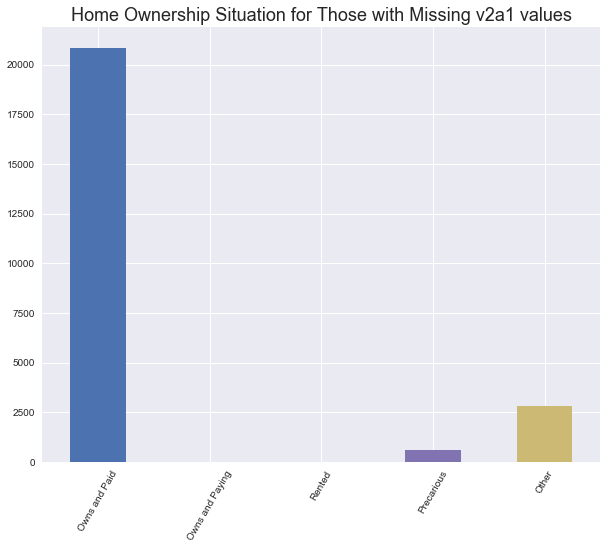

In [116]:
#Let's make a graph to check out what the ownership situation is for the people without v2a1 values
#Make a list of the tipovivi variables
own_variables = [x for x in data if x.startswith('tipo')]

#Plot home ownership variables for homes missing rent payments
data.loc[data['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10, 8), linewidth = 2);
plt.xticks([0, 1, 2, 3, 4],
           ['Owns and Paid', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
          rotation = 60)
plt.title('Home Ownership Situation for Those with Missing v2a1 values', size = 18);

So we can see that most of the people without rent payment values own and have paid for their houses. In those cases, we can set rent payments to \$0. But what about those with precarious or other situations? Given that the median and an overwhelmingly large percent more people pay \$0, let's assign them to \$0 as well. I believe this to be the best way to deal with those people, because by the variable descriptions, they don't appear to be paying rent. If some are, our assumption is that there aren't enough people among the "precarious" or "other" groups who actually pay rents to make a significant difference to our estimates. 

Other people on Kaggle have just opted to create dummy variables for those people and left the missing values alone. However, I want to be able to test models that aren't as good with missing data, such as elastic net.

In [117]:
# Fill in households that don't appear to rent the house with 0 rent payment
for i in [1, 2, 4, 5]:
    data.loc[(data['tipovivi{}'.format(i)] == 1), 'v2a1'] = 0

#Did we miss any missing values?
print(data['v2a1'].isnull().sum())

0


No, we didn't miss any! Now let's move on to rez_esc, our variable with the most missing values. rez_esc represents the number of years behind in school. It turns out that this variable is only defined for children from 7 to 19 years old. So, let's fill in 0's for people with other ages and missing values for rez_esc.

In [118]:
data.loc[((data['age'] > 19) | (data['age'] < 7)) & (data['rez_esc'].isnull()), 'rez_esc'] = 0

#How many people are still missing rez_esc values?
print("number: ", data['rez_esc'].isnull().sum())
print("percent: ", data['rez_esc'].isnull().sum() / len(data['rez_esc']))

number:  1161
percent:  0.0347469547781


We still have missing values for a lot of people. However, it's only about 3.5% of our data. Thus, I feel comfortable simply imputing the median value of rez_esc onto these observations.

In [119]:
rezesc = data['rez_esc']
no_na = rezesc.dropna()

print("median: ", np.median(no_na))
data['rez_esc'] = data['rez_esc'].fillna(np.median(no_na))
#Now how many people are still missing rez_esc values?
print("number: ", data['rez_esc'].isnull().sum())

median:  0.0
number:  0


In [120]:
#It also turns out that the maximum value for rez_esc should be 5, so we replace any values greater than 5 with 5
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5

We have 36 missing values each for SQBmeaned and meaneduc. Since we have 1000 times that many observations, these values should have insignificant effects on our predictions. We thus replace them with their respective medians.

In [121]:
for var in ['SQBmeaned', 'meaneduc']:
    value = data[var]
    no_na = value.dropna()

    print("{} median: ".format(var), np.median(no_na))
    data[var] = data[var].fillna(np.median(no_na))
    #How many people are still missing this var's values?
    print("{} number missing: ".format(var), data[var].isnull().sum())

SQBmeaned median:  75.111115
SQBmeaned number missing:  0
meaneduc median:  8.666667
meaneduc number missing:  0


Now we have no more missing values! Let's check our data for outliers.

In [122]:
data.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,3.341300e+04,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.00000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,9557.000000
mean,2.430231e+04,0.047077,4.955706,0.027055,0.993326,0.960464,0.237782,0.324335,0.407775,1.562595,1.970371,0.392033,1.658007,2.050040,0.799808,3.220603,4.020411,4.015264,4.127316,7.210726,0.073085,4.015264,0.590249,0.077335,0.197558,0.008380,0.109478,0.014066,0.001616,0.001317,0.692754,0.230838,0.001526,0.000389,0.014306,0.060186,0.971119,0.018616,0.002424,0.001646,0.671804,0.962978,0.032263,0.004759,0.881124,0.000449,0.003382,0.113758,0.003711,0.222129,0.756263,0.015862,0.002035,0.002125,0.480502,0.471613,0.045761,0.877503,0.033370,0.085625,0.001616,0.000120,0.001766,0.108880,0.324215,0.566905,0.127555,0.302008,0.570437,0.102086,0.265466,0.632448,0.056984,0.488403,0.511597,0.137821,0.123216,0.27187,0.034777,0.059947,0.033340,0.339030,0.308473,0.186514,0.383952,0.013228,0.008739,0.04977

The only things that call my attention here are that the max value for meaneduc is extremely high (37). Let's see how many people have that value above 24 (12 years of school, 4 years of college, plus 8 years of graduate school -- it happens..)

In [123]:
#lot_ed is the amount of households or people in households without heads, where there is a meaneduc above 24
lot_ed = data.loc[(data['meaneduc'] > 24) & ((data['parentesco1'] == 1) | (data['idhogar'].isin(households_no_head['idhogar']))), 'meaneduc']
len(lot_ed)

37

That's a high enough number that it may not be random. Let's check above 30.

In [124]:
lot_ed = data.loc[(data['meaneduc'] > 30) & ((data['parentesco1'] == 1) | (data['idhogar'].isin(households_no_head['idhogar']))), 'meaneduc']
len(lot_ed)

5

There's still 5 such households/people. Let's take a look at two graphs with meaneduc.

C:\Users\Ben Smith\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Ben Smith\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


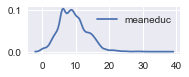

In [125]:
#meaneduc's line graph
ax = plt.subplot(4, 2, 4)
sns.kdeplot(train['meaneduc'], ax = ax, label = "meaneduc")

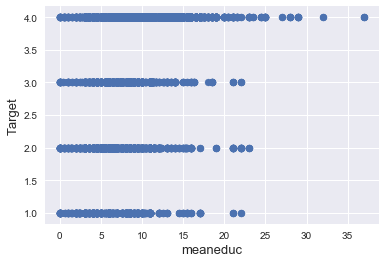

In [126]:
#scatterplot of meaneduc and Target
fig, ax = plt.subplots()
ax.scatter(x = train['meaneduc'], y = train['Target'])
plt.ylabel('Target', fontsize=13)
plt.xlabel('meaneduc', fontsize=13)
plt.show()

I thought the above-30 values were outliers and maybe they are. However, I'm not so sure anymore. Let's leave meaneduc alone, then.

We can now check out correlations between our variables.

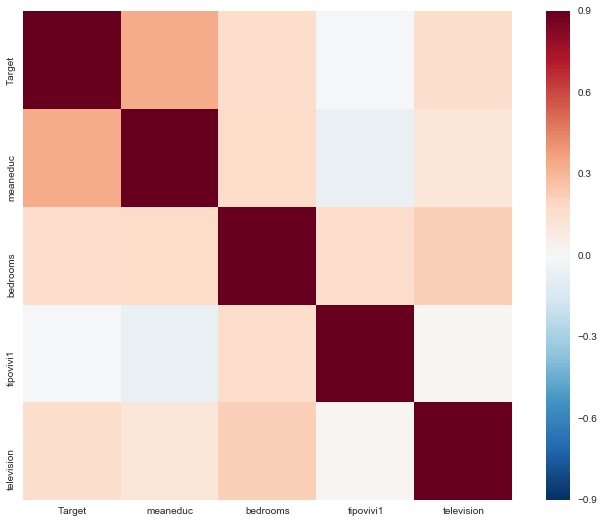

In [127]:
#Correlation in training data between Target and a couple other variables that I think might be important

new_data = data.copy()
new_data = new_data.dropna()

specialvars = pd.DataFrame([new_data['Target'], new_data['meaneduc'], new_data['bedrooms'], new_data['tipovivi1'], new_data['television']]).T

corrmat = specialvars.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)


The most highly correlated variables we have here are meaneduc and Target, which is certainly an interesting sign. 

Our squared variables are highly correlated with the variables they square (by definition), so we drop them. 

In [128]:
sqr = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

data = data.drop(sqr, axis = 1)
data.shape

(33413, 134)

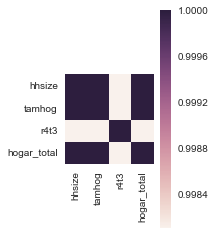

In [129]:
#The following variables are very similar in their definitions. Let's see their correlation
corrvars = pd.DataFrame([new_data['hhsize'], new_data['tamhog'], new_data['r4t3'], new_data['hogar_total']]).T

corrmat = corrvars.corr()
plt.subplots(figsize=(2,4))
sns.heatmap(corrmat, vmax=1, square=True)

They are almost perfectly correlated. Let's drop tamhog and hogar_total, as well as r4t3, which is only slightly less correlated with the others.

In [130]:
for var in ['tamhog', 'hogar_total', 'r4t3']:
    data = data.drop(var, axis = 1)

We also drop extra dummy variables ("other" dummies) to avoid multicolinearity issues.

In [131]:
for var in ["paredother", "pisoother", "techootro", "elimbasu6", "tipovivi5", "sanitario6"]:
    data = data.drop(var, axis = 1)

Drop variables that are represented in other variables (such as the tablet dummy -- we also have the number of tablets).

In [132]:
for var in ['mobilephone', 'v18q']:
    data = data.drop(var, axis = 1)

Let's scale our variables.

In [133]:
#Scale variables

ids = ['Id', 'idhogar']

new_data = data.copy()
new_data = new_data.drop(ids, axis=1)
new_data = new_data.drop("Target", axis=1)

scaler = StandardScaler()
scaler.fit(new_data)
s_data = scaler.fit_transform(new_data)

s_data #I have checked and this array has near 0 mean and 1 std. dev. for its variables

array([[ 2.21776232, -0.22226846, -1.28695663, ...,  0.62418173,
        -0.62418173,  0.39631852],
       [ 1.48162094, -0.22226846, -0.62890439, ...,  0.62418173,
        -0.62418173,  1.50375274],
       [-0.32527154, -0.22226846,  2.00330459, ...,  0.62418173,
        -0.62418173,  2.65733005],
       ..., 
       [-0.32527154, -0.22226846, -1.28695663, ..., -1.60209753,
         1.60209753, -1.03411734],
       [-0.32527154, -0.22226846, -1.28695663, ..., -1.60209753,
         1.60209753, -1.03411734],
       [-0.32527154, -0.22226846, -1.28695663, ..., -1.60209753,
         1.60209753,  0.76546326]])

Now let's split our test and train files back up by whether or not their target variables are null.

In [134]:
new_test = data.loc[(data['Target'].isnull()),]
new_train = data.loc[(data['Target'].notnull()),]
new_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,pisomoscer,pisocemento,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,computer,television,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
0,ID_279628684,190000.0,0,3,0,1,1,0.0,0,1,1,0,0,0,0,1,1,10,0.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,0.0,10.0,0.0,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,43,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1.0,0,1,1,0,0,0,0,1,1,12,0.0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,8.0,12.0,0.0,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,67,4.0
2,ID_68de51c94,0.0,0,8,0,1,1,0.0,0,0,0,0,1,1,0,1,1,11,0.0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,8.0,0.0,11.0,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,4.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1.0,0,2,2,1,1,2,1,3,4,9,1.0,4,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,1.0,11.0,0.0,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,3,1,0,0,0,0,0,1,0,17,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1.0,0,2,2,1,1,2,1,3,4,11,0.0,4,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,1.0,11.0,0.0,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,3,1,0,0,0,0,0,1,0,37,4.0


Scale train and test files.

In [135]:
extra_new = new_train.copy()
extra_new = extra_new.drop(ids, axis=1)
extra_new = extra_new.drop("Target", axis=1)

scaler = StandardScaler()
scaler.fit(extra_new)
s_train = scaler.fit_transform(extra_new)

extra_test = new_test.copy()
extra_test = extra_test.drop(ids, axis=1)
extra_test = extra_test.drop("Target", axis=1)

scaler = StandardScaler()
scaler.fit(extra_test)
s_test = scaler.fit_transform(extra_test)

#o_train will be our original training data, but without the id variables
o_train = extra_new.copy()

Now let's begin the most important part: modeling!! We begin by using a simple linear regression to see the preliminary coefficients of our variables on Target within the training dataset. Let's remember what we want to do though: we want to predict individuals' poverty levels.

In [136]:
#Regression

target = train["Target"]

#I choose eta0 as .01 because .01 generally serves pretty well for initial models
linear_regression_model = SGDRegressor(eta0=.01)

linear_regression_model.fit(s_train, target)
sorted(list(zip(new_data.columns, linear_regression_model.coef_)), key=lambda x: abs(x[1]))

[('elimbasu5', 0.0),
 ('v14a', 0.022633549757243632),
 ('r4m1', 0.088969572027771421),
 ('abastaguano', -0.16694843616857996),
 ('techozinc', 0.18535597477087021),
 ('tipovivi3', 0.19051801369672941),
 ('r4t1', -0.23139008968963967),
 ('estadocivil7', 0.26144715691495923),
 ('tamviv', 0.28018590339823551),
 ('abastaguafuera', -0.31279899291162),
 ('elimbasu4', -0.3334087511751283),
 ('pareddes', -0.33874722698228427),
 ('abastaguadentro', 0.35103925410836889),
 ('parentesco11', -0.36317385860903323),
 ('escolari', 0.38799948556482083),
 ('instlevel6', -0.39120888692197692),
 ('parentesco8', -0.41556986524129469),
 ('techoentrepiso', 0.4243523257966646),
 ('r4h1', -0.44655129315757164),
 ('pisocemento', -0.50662537853829148),
 ('rez_esc', -0.53997444838337338),
 ('hogar_adul', 0.55386249942132304),
 ('dependency', -0.57313548284929838),
 ('sanitario1', -0.70269564884260338),
 ('r4m3', -0.7671402760996836),
 ('qmobilephone', 0.80600674204381917),
 ('epared1', -0.84377701191012011),
 ('r4

There we have some coefficients. Some highly correlated variables are the type of electricity plan the household is on, marriage, housing conditions, age, bedrooms, and other such things. Let's see what we can get out of some other models.

In [137]:
X_train, X_test, y_train, y_test = train_test_split(s_train, target, test_size=0.2, random_state=42) 
#My preliminary choice of test_size is because it looks like with .2, the model does comparatively well while still having quite a large test set -- thus, giving the model more external robustness

Let's see the MSE on the regression.

In [138]:
#I now choose eta0 = .001 because its MSE's come out better than for .01 and .0001
linear_regression_model = SGDRegressor(eta0=.001)
linear_regression_model.fit(X_train, y_train)
train_predictions = linear_regression_model.predict(X_train)
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.6625545747654318
Test MSE: 0.6788431560375177


Not too bad already. Let's see a learning curve.

In [139]:
## source: http://scikit-learn.org/0.15/auto_examples/plot_learning_curve.html (Tyler showed us this function in class)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(mean_squared_error))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Ben Smith\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

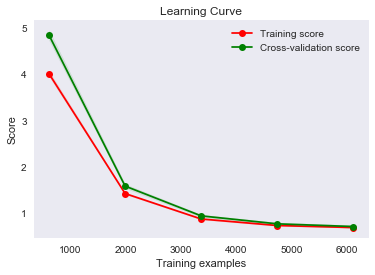

In [140]:
plot_learning_curve(linear_regression_model, "Learning Curve", X_train, y_train, cv=5)

It looks like the cross-validation and training scores begin to flatten out by around 6000 training examples. Now let's start working with the models we learned over the last couple weeks. We start with a logistic regression with L2-norm penalties.

In [141]:
target = train["Target"]

X_train, X_test, y_train, y_test = train_test_split(s_train, target, test_size=0.33, random_state=42)

clf = linear_model.LogisticRegression(penalty='l2')
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [142]:
#Check the accuracy of this model
print("Train acc: {}".format(accuracy_score(y_train, train_predictions)))
print("Test acc: {}".format(accuracy_score(y_test, test_predictions)))

Train acc: 0.703576448539747
Test acc: 0.6778693722257451


Let's see a learning curve for this model.

<module 'matplotlib.pyplot' from 'C:\\Users\\Ben Smith\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

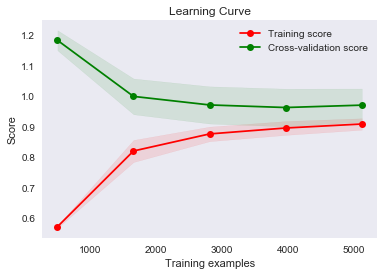

In [143]:
plot_learning_curve(clf, "Learning Curve", X_train, y_train, cv=5)

It looks like this model overfits. Also, it's cross-validation score looks about flat after 3000 training examples. If we change test size to 0.2, the graph indicates that we should at least reduce overfitting. Let's see if we also get better accuracy.

In [144]:
X_train, X_test, y_train, y_test = train_test_split(s_train, target, test_size=0.2, random_state=42)

clf = linear_model.LogisticRegression(penalty='l2')
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [145]:
#Check the accuracy of this model
print("Train acc: {}".format(accuracy_score(y_train, train_predictions)))
print("Test acc: {}".format(accuracy_score(y_test, test_predictions)))

Train acc: 0.6952256376716809
Test acc: 0.678347280334728


Our model does overfit less and our test even got slightly more accurate! Let's continue.

In [146]:
#How does the confusion matrix look?
confusion_matrix(y_test, test_predictions)

array([[  43,   51,    8,   67],
       [  14,  104,   21,  163],
       [  14,   43,   18,  182],
       [   6,   37,    9, 1132]])

We seem to be doing pretty poorly actually. This model seems to overweight higher classes -- more class 1, 2, and 3 people were predicted to be in class 4 than in their own class.

Now let's see our F1 score with this model. Note that the parameter "average = 'macro'" makes this F1 score the average F1 score over our for classes.

In [147]:
print("Train F1 Score: {}".format(f1_score(y_train, train_predictions, average = "macro")))
print("Test F1 Score: {}".format(f1_score(y_test, test_predictions, average = "macro")))

Train F1 Score: 0.45398553578973244
Test F1 Score: 0.4204646378910959


With .4 as a baseline for good F1 scores, our test F1 score is actually a good start, though it could hopefully be better. Let's see the coefficients we get from this model.

In [148]:
#Note that since this is a logistic regression, taking exp() of the coefficients makes them more interpretable as how much each variable influences the class
sorted(list(zip(o_train.columns, np.exp(clf.coef_[0]))), key=lambda x: x[1])

[('edjefe', 0.59314045173373819),
 ('qmobilephone', 0.60798383113320786),
 ('v2a1', 0.60869223530623207),
 ('meaneduc', 0.62237462423644485),
 ('overcrowding', 0.69315373838089989),
 ('instlevel9', 0.73996226902783013),
 ('bedrooms', 0.75926679263078833),
 ('hogar_adul', 0.76474982890265009),
 ('age', 0.76791164005375856),
 ('r4h2', 0.7920971856231821),
 ('parentesco4', 0.79336300957336547),
 ('elimbasu4', 0.8178944298360149),
 ('parentesco6', 0.84069455310415664),
 ('television', 0.86332801130594161),
 ('dependency', 0.86539101915506111),
 ('estadocivil6', 0.8693503075371718),
 ('etecho3', 0.88630004853511812),
 ('coopele', 0.88904166781126692),
 ('eviv1', 0.89092535030590336),
 ('edjefa', 0.89388016839978635),
 ('hacapo', 0.89581243091903173),
 ('public', 0.89731033061334131),
 ('instlevel8', 0.89763671244237064),
 ('lugar6', 0.90150462242565388),
 ('area2', 0.91009222281482882),
 ('refrig', 0.91492216430711226),
 ('energcocinar2', 0.91839134317759208),
 ('r4h3', 0.91999855274625841)

It looks like there are a lot of influential variables. The most positively influential are related to connection to sewer systems or cess pools, as well as how many children under 20 are in the household. The first two variables make sense, although the third doesn't so much. Maybe children under 20 are on average a good source of labor, which does make sense to me. The most negatively influential variables are male heads of households' education level, the number of cell phones and monthly rent payment. Kind of strange, especially the negative weight given to male heads' education level. Maybe that is due to 'edjefe''s nature as an interaction term.

Let's do the same thing we did just above, but using an L1-norm penalty this time.

In [149]:
X_train, X_test, y_train, y_test = train_test_split(s_train, target, test_size=0.2, random_state=42)

clfnew = linear_model.LogisticRegression(penalty='l1')
clfnew.fit(X_train, y_train)
train_predictions = clfnew.predict(X_train)
test_predictions = clfnew.predict(X_test)

In [150]:
#Check the accuracy of this model
print("Train acc: {}".format(accuracy_score(y_train, train_predictions)))
print("Test acc: {}".format(accuracy_score(y_test, test_predictions)))

Train acc: 0.695356442119032
Test acc: 0.6793933054393305


Our testing set got a little more accurate! Let's see a learning curve for this model.

<module 'matplotlib.pyplot' from 'C:\\Users\\Ben Smith\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

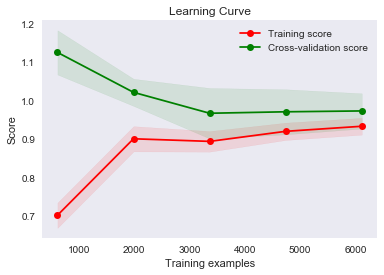

In [151]:
plot_learning_curve(clfnew, "Learning Curve", X_train, y_train, cv=5)

It looks like this model has more variance in its cross-validation score than the L2-norm model. Its variance seems to go down as trainging examples go from 3000 to 6000, though. 0.2 looks like it was a good choice for the test size again.

In [152]:
#How does the confusion matrix look?
confusion_matrix(y_test, test_predictions)

array([[  43,   51,    8,   67],
       [  14,  106,   19,  163],
       [  14,   43,   18,  182],
       [   6,   37,    9, 1132]])

The confusion matrix looks pretty similar for this model.

Now let's see our F1 scores with this model. 

In [153]:
print("Train F1 Score: {}".format(f1_score(y_train, train_predictions, average = "macro")))
print("Test F1 Score: {}".format(f1_score(y_test, test_predictions, average = "macro")))

Train F1 Score: 0.4538180136047566
Test F1 Score: 0.4221455277886381


We did a tiny bit better here than with our first model. Let's see our new coefficients.

In [154]:
sorted(list(zip(o_train.columns, np.exp(clfnew.coef_[0]))), key=lambda x: x[1])

[('r4h2', 0.5752965561637472),
 ('edjefe', 0.6055329443113312),
 ('qmobilephone', 0.60834680184789969),
 ('meaneduc', 0.61830190444509614),
 ('v2a1', 0.62364899949234998),
 ('overcrowding', 0.71722643210324966),
 ('instlevel9', 0.78870361685231527),
 ('age', 0.79318610765088327),
 ('bedrooms', 0.79511048032904974),
 ('parentesco4', 0.79521362529528095),
 ('elimbasu4', 0.82913338476109522),
 ('parentesco6', 0.84127196375186908),
 ('television', 0.86511210664416949),
 ('dependency', 0.87312727514649835),
 ('estadocivil6', 0.8777142707704475),
 ('area2', 0.88972339643857501),
 ('eviv1', 0.89089314339629366),
 ('lugar6', 0.89185524473263067),
 ('etecho3', 0.89189096566563408),
 ('hacapo', 0.89615734122826196),
 ('instlevel8', 0.90885733518974188),
 ('energcocinar2', 0.91005023536176322),
 ('edjefa', 0.91071328183270739),
 ('refrig', 0.91535690105507228),
 ('cielorazo', 0.92341959025398679),
 ('parentesco12', 0.92803348463592172),
 ('instlevel3', 0.93618409257539292),
 ('pareddes', 0.941257

Since we have an L1-norm penalty now, coefficients can go to zero. As a result, we have several variables with coefficients valuing exp(0) = 1, and several other variables get heavier coefficients. We also have some differences among the most influential variables. 'hogar_nin' passed the sanitation variables to become the most positively influential. Also, the number of males over 12 in the household became the most negatively influential, which is strange, and the household's mean education level is the fourth lowest coefficient, which is also very strange. I imagine that this is because of correlation with variables that have negative effects. However, I can't put my finger on which variable(s) would be the culprit.

Now let's try an SVM model! I have run multiple iterations of the following function in order to estimate the best hyper-parameters. I skip making choices in this code in the interest of saving time for the final version of code.

In [160]:
clfsvm = SVC()
gridsearch = GridSearchCV(clfsvm, {"C": [0.2], "kernel": ['linear'], 
                                'degree': [1], 'gamma': [1]}, scoring='accuracy')
gridsearch.fit(X_train, y_train)
print("Best Params: {}".format(gridsearch.best_params_))
print("Test Accuracy: {}".format(accuracy_score(y_test, gridsearch.predict(X_test))))

#Best: linear/rbf, C: (linear) .2 / (rbf) .5, gamma: 1, degree: 1 -> F1: .606

Best Params: {'C': 0.2, 'degree': 1, 'gamma': 1, 'kernel': 'linear'}
Test Accuracy: 0.680439330543933


This accuracy looks pretty similar to the accuracy in our logistic regressions.

In [165]:
#Make predictions
train_predictions = gridsearch.predict(X_train)
test_predictions = gridsearch.predict(X_test)

In [166]:
#How does the confusion matrix look?
confusion_matrix(y_test, test_predictions)

array([[  51,   39,    1,   78],
       [  20,  103,    4,  175],
       [  14,   45,    4,  194],
       [   5,   34,    2, 1143]])

This confusion matrix looks maybe a bit better than in our logistic regressions.

Let's see the F1 score for our SVM model.

In [167]:
print("Train F1 Score: {}".format(f1_score(y_train, train_predictions, average = "macro")))
print("Test F1 Score: {}".format(f1_score(y_test, test_predictions, average = "macro")))

Train F1 Score: 0.4429125558656873
Test F1 Score: 0.4104088357664203


We seem to have some overfitting, and our F1 score is worse than it is for our logistic regressions.

Let's look at our coefficients from this model.

In [171]:
sorted(list(zip(o_train.columns, gridsearch.best_estimator_.coef_[0])), key=lambda x: x[1])

[('overcrowding', -0.5363382869121267),
 ('bedrooms', -0.41261672222752566),
 ('v2a1', -0.25715461830614927),
 ('edjefe', -0.23248001060094481),
 ('meaneduc', -0.22876169456159801),
 ('age', -0.21644034075144702),
 ('r4h2', -0.1648969895254524),
 ('refrig', -0.15886572560595624),
 ('tamviv', -0.15072797765040136),
 ('estadocivil6', -0.14973516496934014),
 ('lugar6', -0.13960084104359161),
 ('dependency', -0.13930250380460762),
 ('parentesco6', -0.13914053115862934),
 ('parentesco4', -0.13087955005830931),
 ('elimbasu2', -0.12306451180504752),
 ('estadocivil2', -0.088301496015176006),
 ('parentesco12', -0.087280255221417136),
 ('paredzocalo', -0.084187275641181003),
 ('etecho3', -0.082009538045348052),
 ('instlevel3', -0.077754276621450735),
 ('hogar_adul', -0.077646401794780218),
 ('cielorazo', -0.072746936395702733),
 ('pareddes', -0.071472958931785513),
 ('qmobilephone', -0.07054866888996969),
 ('energcocinar2', -0.066452294864948414),
 ('parentesco3', -0.05662685076354812),
 ('instl

Now the most influential variables are different. Electricity plans and the number of males below 12 years old are now among the variables with higher positive influence. I'm not sure why males below 12 years old would have such a positive influence. The variables whose coefficients are most negative are now overcrowding, the number of bedrooms, and v2a1. This seems to indicate a trend where poorer people tend to group together, overcrowding bigger houses.

Now let's try random forest! Through lots of iterations of the following code, I have already estimated the best hyperparameters for this model. In order for this code to run faster, I don't estimate the best parameters in this, the final version of my code.

In [172]:
n_estimators = [5000]
max_depth = [3]
class_weights = [None]
best_f1 = 0

for est in n_estimators:
    for depth in max_depth:
        for wgt in class_weights:
            print(est, depth, wgt)
            clfrf = RandomForestClassifier(n_estimators=est, max_depth=depth, oob_score=True, class_weight=wgt)
            clfrf.fit(X_train, y_train)
            f1 = f1_score(y_train, np.argmax(clfrf.oob_decision_function_ , 1), average = "macro")
            if f1 > best_f1:
                best_f1 = f1
                best_params = (est, depth, wgt)

print("Best OOB F1: {}".format(best_f1))
print("Best params: {}".format(best_params))

#Best: 5000, 3, None -> F1: .49

5000 3 None
Best OOB F1: 0.09877899153011954
Best params: (5000, 3, None)


C:\Users\Ben Smith\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


We get a warning that this model is only looking at two classes. There seems to be some sort of bug in this model, but if there is, I couldn't find it.

Let's see a classification report for this model.

In [173]:
clfrf = RandomForestClassifier(n_estimators=best_params[0], max_depth=best_params[1], class_weight=best_params[2])
clfrf.fit(X_train, y_train)
test_predictions = clfrf.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, test_predictions))

Test Classification Report:
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       169
          2       0.50      0.06      0.10       302
          3       0.00      0.00      0.00       257
          4       0.63      1.00      0.77      1184

avg / total       0.47      0.63      0.49      1912



C:\Users\Ben Smith\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Notice that our F1 score is displayed as .49, but that's without counting the 0's in classes 1 and 3. Thus, this model is actually pretty terrible.

In [174]:
#How does the confusion matrix look?
confusion_matrix(y_test, test_predictions)

array([[   0,   17,    0,  152],
       [   0,   17,    0,  285],
       [   0,    0,    0,  257],
       [   0,    0,    0, 1184]])

This model mostly predicts that observations are not vulnerable, with 34 predictions of Class 2. Probably not the most useful model.

Let's see what the most important features are.

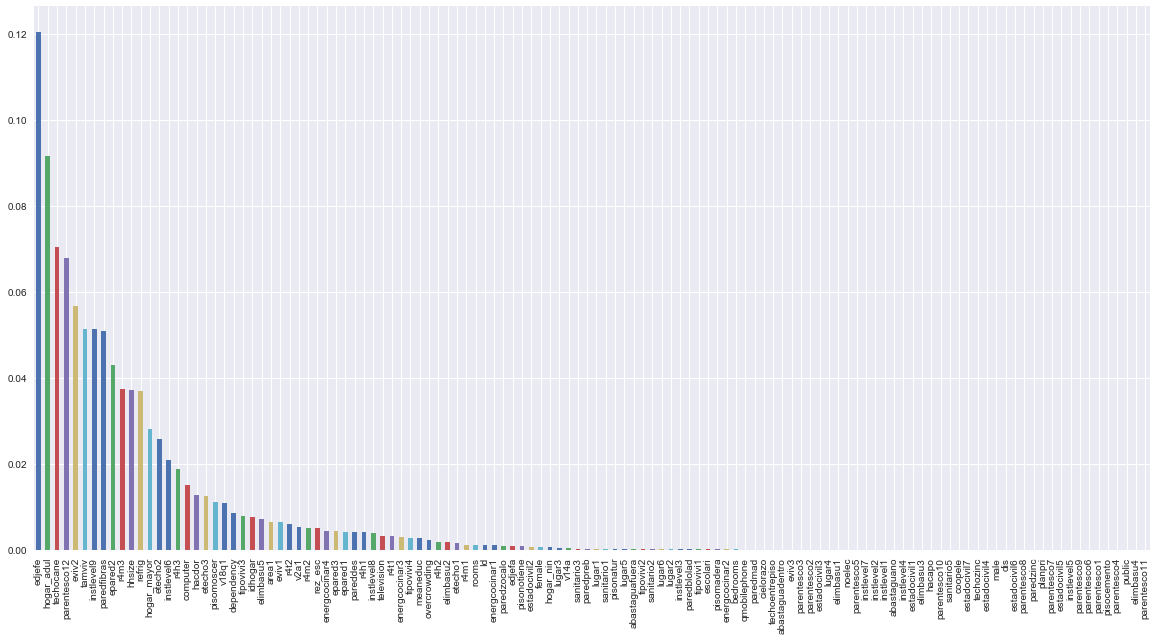

In [175]:
feature_imp = sorted(list(zip(data.columns, clfrf.feature_importances_)), key=lambda x: x[1], reverse=True)
pd.Series([x[1] for x in feature_imp], index=[x[0] for x in feature_imp]).plot(kind='bar', figsize=(20,10))

This model most heavily weights male heads' education, then number of adults and roofs made mostly of fiber.

In [176]:
#Which classes aren't being represented?
set(y_test) - set(test_predictions)

{1, 3}

Our L1-norm logistic regression did best! We will now use our optimal logistic regression model (with an L1-norm penalty and the best hyperparameters we found), so that we can get the best predictions possible for our test file.

In [178]:
final_target = data["Target"]

X_train = s_train
X_test = s_test

y_train = target

clffin = linear_model.LogisticRegression(penalty='l1')

#Predict
clffin.fit(X_train, target)
train_predictions = clffin.predict(X_train)
test_predictions = clffin.predict(X_test)

In [179]:
#Check the accuracy of this model
print("Train acc: {}".format(accuracy_score(target, train_predictions)))

Train acc: 0.6893376582609606


In [180]:
#How does the confusion matrix look?
confusion_matrix(target, train_predictions)

array([[ 204,  246,   19,  305],
       [  79,  596,   74,  809],
       [  38,  208,  130,  845],
       [  44,  236,   66, 5658]])

Here's our final classification report.

In [181]:
print("Test Classification Report:")
print(classification_report(target, train_predictions))

Test Classification Report:
             precision    recall  f1-score   support

          1       0.56      0.26      0.36       774
          2       0.46      0.38      0.42      1558
          3       0.45      0.11      0.17      1221
          4       0.74      0.94      0.83      6004

avg / total       0.64      0.69      0.64      9557



Here is our training F1 score. What is our test score? We may never know, since we don't have our target values for the test dataset. 

In [182]:
print("Train F1 Score: {}".format(f1_score(target, train_predictions, average = "macro")))

Train F1 Score: 0.4450745955177419


This training F1 score is pretty good. We can assume our test F1 score will be a little bit lower, maybe .03 lower, based on our previous cross-validation with this model. The test score should still come out okay, then.

Here are the coefficients for our final model.

In [183]:
sorted(list(zip(o_train.columns, clffin.coef_[0])), key=lambda x: x[1])

[('edjefe', -0.58523960270861075),
 ('v2a1', -0.49407576433003597),
 ('qmobilephone', -0.48120630795960206),
 ('r4h2', -0.47175664917506177),
 ('meaneduc', -0.35681706640421096),
 ('overcrowding', -0.34316718007101121),
 ('age', -0.31915718633666607),
 ('instlevel9', -0.29567573147640047),
 ('bedrooms', -0.27087398644333438),
 ('parentesco4', -0.2627277729459857),
 ('parentesco6', -0.19154227776019159),
 ('elimbasu4', -0.18050550950456329),
 ('television', -0.17976051096917342),
 ('instlevel8', -0.17898896770403863),
 ('dependency', -0.15994588210383145),
 ('hacapo', -0.1294655952939619),
 ('eviv1', -0.12823839457298614),
 ('estadocivil6', -0.12647669354363303),
 ('hogar_adul', -0.1175008757591335),
 ('area2', -0.1170310995719495),
 ('etecho3', -0.11312554240897975),
 ('edjefa', -0.11107505432743062),
 ('epared3', -0.10888421176582963),
 ('parentesco3', -0.098007194466914985),
 ('parentesco12', -0.096479090889002805),
 ('energcocinar2', -0.095578812308200742),
 ('cielorazo', -0.0944418

Our coefficients here are similar to the ones we found with this model above.

Lastly, we append our predictions to their id's and save them to a csv file.

In [185]:
final_preds = pd.DataFrame([test['Id'],test['idhogar'],test_predictions])
final_preds = final_preds.T
#Name the head of the Target column
final_preds.rename(columns={'Unnamed 0':'Target'}, inplace=True)
final_preds.to_csv('hw4preds.csv', index=False)

### Summary

#### Model Selection

The main models I tried were: logistic regression (with an L1-norm penalty and then an L2-norm penalty), SVM, and random forest. I chose these models because they tend to be good models for classification, and I wanted to see which one would do best in this case. 

Logistic regressions work similar to linear regressions, where you run a regression between lots of variables and get coefficients between them. The big difference is that logistic regressions use the logistic function, which can give probabilities for predicted y-values. SVM works by fitting lines to get the best possible division between classes. It incorporates a parameter C, which determines the amount of margin violations that can be allowed. Random forest is an ensemble of independent decision trees. By using lots of simple decision trees, random forest picks the combination of nodes that minimizes the Gini impurity, or level of class mixture within nodes.

Each operates with its own assumptions. Logistic regressions are similar to linear regressions in their assumptions that variables are random and normally distributed. To account for this assumption, I looked at variables that may be correlated and tested whether or not they aren't. I then dealt with correlated variables as I saw best. I also dealt with missing values as seemed most appropriate, since logistic regressions wouldn't work with missing values, either.

SVM relies on the assumption that there are no outliers -- individuals of one class that follow the distribution of another. To account for this, I looked for outliers. I didn't find any, which I found to be an encouraging sign. However, it is possible that I overlooked lurking outliers.

Random forest assumes that the lowest Gini impurity is the best, which leads it to want to divide all observations until they get put into pure leaves. This means that it is prone to overfitting. So, I set a max depth parameter so that would not happen.

I selected my hyperparameters for my models using learning curves and the Grid Search function, which helped me to pick the best hyperparameters for my models.

#### Model Evaluation

I evaluated my model by looking at its accuracy, its precision, its recall, and most importantly, its F1 score. My model does best at predicting correctly those who are not vulnerable to poverty (class 4). It could be improved, however in predicting classes 1, 2, and 3 more accurately. This model predicts way more people to be non-vulnerable than actually are. The metrics I use are similar -- the accuracy of the model is somewhat better than the F1 score when I test it using cross-validation within the training dataset. Also, my model has better recall than precision for class 4, but better precision than recall for the other classes.

#### Model Interpretation

The model tells me that 'hogar_nin' (The number of children under 20 in the family), 'sanitario3' (septic tank) and 'sanitario2' (sewer or cess pool) have the most important positive effects on people's poverty status, while 'edjefe' (education level of male head of household), 'v2a1' (rent payment) and 'qmobilephone' (number of cell phones) have the most important negative effects. These variables' influences aren't all intuitive. We discussed above the possible positive effects of 'hogar_nin' and the sanitation variables, as well as the negative correlation between rent payments and poverty levels. Also, 'edjefe' may have a negative effect because it is correlated with things that are negative influences. The number of cell phones in a household may be indicative either of overspending or of overcrowding -- a house with 9 people would tend to demand more cell phones than a house of 3.

We have a problem with high variance, where the model tends to predict the training data better than the testing data. However, I tried to account for that by removing unnecessary variables in order to simplify the model. 

I am fairly confident in my results. The final training F1 score was about .445, which is not great but it's okay. So, I think that my coefficients indicate true relationships, but they don't tell the whole story about why some people are poor and others aren't, while still others are somewhere in between.

#### Model Usefulness

I think my model is useful. I would recommend using it to predict whether someone is not vulnerable to poverty. My model is especially useful if the user wants to avoid false negatives as much as possible, since class 4's recall score is 0.94. Thus, with a 94% likelihood that you won't have a false negative and a 74% likelihood that you won't get a false positive, you could tell people whether or not they are in the least vulnerable category to go into poverty. The precision may not look so good, but it's a lot better than a random guess. So, this model does have a lot of predictive power for class 4, and it can help somewhat in predicting placement in class 1 as well. I would avoid using it to predict placement in class 2 or 3, however because it does very poorly in predicting placement into both of those classes.